# Pilot data check - TODO

- frame rate/subject
- number of grasps/subject
- number of eye samples/object
- number of eye samples/grasped object
- number of eye samples/grasped object/sorting type --> shouldn't be different
- number of samples with NaN
- validation error across trials/subject
- azimuth and elevation angles/subject (histograms)
- Amplitude of head movements based on velocity
- Saccade amplitude based on velocity

# Quick notes
Subjects 1001, 1002, 1003, 1004, 1005, 1007 --> no grasped object recorded

In [1]:
import ProtobufTypes_pb2 
import pandas as pd
import sys
from google.protobuf.json_format import MessageToDict
import collections
import numpy as np
import glob
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pickle
import pprint
from IPython.display import display
PLOT_DIR = './PLOTS/data_quality/'
os.makedirs(os.path.dirname(PLOT_DIR), exist_ok=True)
sns.set(context = "talk", style="white", palette="dark", font_scale=1, rc={'figure.figsize':(11.7,8.27)})
COLORS = {'g': '#CAE6CB', 'r': '#E6CACA', 'b': '#C9D4F5'}

In [2]:
# pickle the data
def pickleData(filepath,filename, data):
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(str(filepath+filename),'wb') as fh:
        pickle.dump(data,fh)

# read from pickled data
def read_dataFrameFromFile(filename):
    with open(filename, 'rb') as fh:
        dataframe = pickle.load(fh)
    return dataframe

In [3]:
protobuf_obj = ProtobufTypes_pb2.EyetrackingDataSet()
files = glob.glob("./subject2*.etd")
samples_df = pd.DataFrame()
shelf_df = pd.DataFrame()
for fi in files:
    try:
        with open(fi, "rb") as f:
            protobuf_obj.ParseFromString(f.read())
        dict_obj = MessageToDict(protobuf_obj)
        for nT, trial in enumerate(dict_obj['trials']):
            tmpdf = pd.io.json.json_normalize(data=trial['samples'])
            if 'handData.graspedObject' in tmpdf.columns:
                tmpdf = tmpdf.loc[:, ['unixTimestamp','timestamp', 'combinedEye.raycastHitObject','handData.graspedObject']]
            else:
                tmpdf = tmpdf.loc[:, ['unixTimestamp','timestamp', 'combinedEye.raycastHitObject']]
                                  
            tmpdf['trialID'] = trial['metaData']['trialID'] if 'trialID' in trial['metaData'] else np.NaN  
            tmpdf['subjectID'] = dict_obj['subjectID']
            tmpdf['trialNum'] = nT
            samples_df = pd.concat([samples_df, tmpdf], ignore_index=True, sort=False)             
            
            tmpdf = pd.io.json.json_normalize(data=trial['metaData']['initialConfiguration']['items'])
            tmpdf['trialID'] = trial['metaData']['trialID'] if 'trialID' in trial['metaData'] else np.NaN  
            tmpdf['subjectID'] = dict_obj['subjectID']
            tmpdf['trialNum'] = nT
            shelf_df = pd.concat([shelf_df, tmpdf], ignore_index=True, sort=False) 
            
    except FileNotFoundError:
        print("{} not found, moving on!".format(fi))
    
# pickleData('./Data/','reducedAllData',samples_df)
# del samples_df
# pickleData('./Data/','allShelfData',shelf_df)
# del shelf_df

c:\users\akeshava\.conda\envs\conda_ergovr\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [6]:
samples_df = read_dataFrameFromFile('./Data/reducedAllData')

In [4]:
samples_df.head(20)

,unixTimestamp,timestamp,combinedEye.raycastHitObject,handData.graspedObject,trialID,subjectID,trialNum
0,NaN,-1.000000,Sphere_Green,NaN,NaN,2001,0
1,NaN,0.333333,Sphere_Green,NaN,NaN,2001,0
2,NaN,0.344821,Sphere_Green,NaN,NaN,2001,0
3,NaN,0.353335,Sphere_Green,NaN,NaN,2001,0
4,NaN,0.363096,Sphere_Green,NaN,NaN,2001,0
5,NaN,0.373465,Sphere_Green,NaN,NaN,2001,0
6,NaN,0.384252,Sphere_Green,NaN,NaN,2001,0
7,NaN,0.395165,Sphere_Green,NaN,NaN,2001,0
8,NaN,0.406325,Sphere_Green,NaN,NaN,2001,0
9,NaN,0.417790,Sphere_Green,NaN,NaN,2001,0


In [8]:
samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824140 entries, 0 to 824139
Data columns (total 7 columns):
unixTimestamp                   0 non-null float64
timestamp                       824140 non-null float64
combinedEye.raycastHitObject    803429 non-null object
handData.graspedObject          221787 non-null object
trialID                         754310 non-null float64
subjectID                       824140 non-null int64
trialNum                        824140 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 44.0+ MB


In [5]:
samples_df.isna().mean()

unixTimestamp                   1.000000
timestamp                       0.000000
combinedEye.raycastHitObject    0.046901
handData.graspedObject          0.697231
trialID                         0.077690
subjectID                       0.000000
trialNum                        0.000000
dtype: float64

In [6]:
filtered_df = samples_df.fillna({'trialID':0})
filtered_df = filtered_df.drop(columns='unixTimestamp')
filtered_df = filtered_df.loc[(filtered_df.timestamp!=-1), :]

In [7]:
filtered_df.subjectID.unique()

array([2001, 2002, 2004, 2005, 2006, 2011, 2012, 2013, 2014, 2015, 2017,
       2018, 2020, 2021], dtype=int64)

In [8]:
filtered_df.trialNum.value_counts()

2     203335
4     156771
14    148003
1     144455
6     132654
3     130814
19    125858
15    115564
12    112132
9     112024
8     110369
5     110357
23    102629
11    101204
20     99887
10     97574
13     97143
16     93054
18     83609
7      82368
0      77237
21     75788
17     75713
22     70802
Name: trialNum, dtype: int64

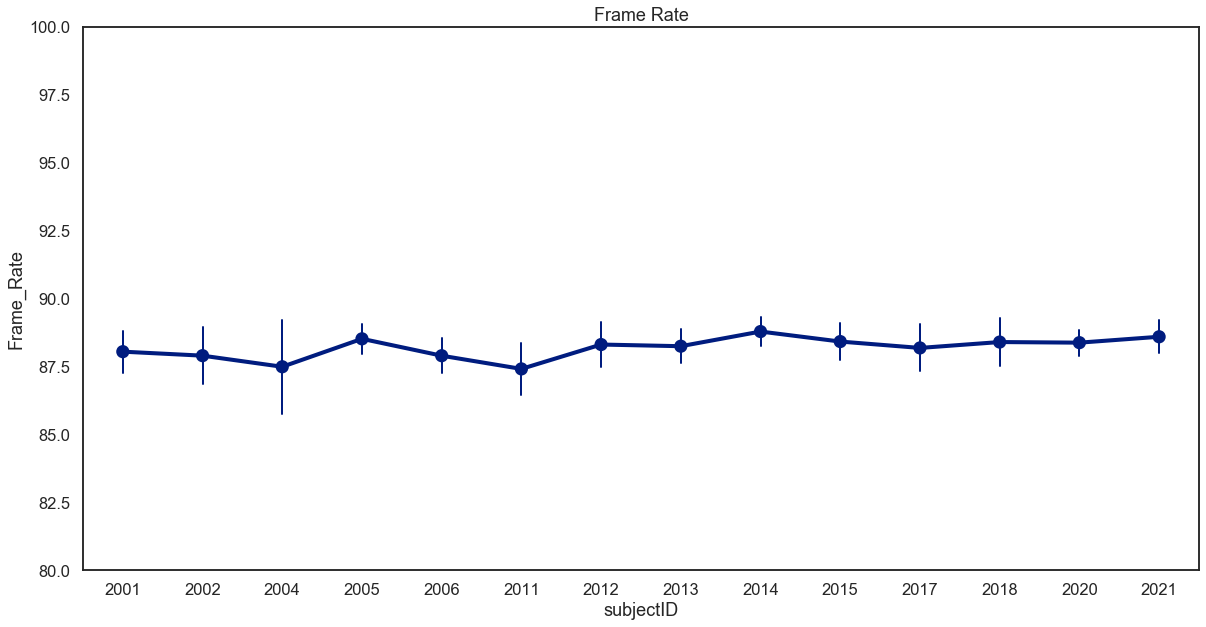

In [19]:
tmpdf = (
    samples_df
    .groupby(['subjectID','trialNum'])['timestamp']
    .apply(lambda x: 1/np.mean(x - x.shift()))
    .rename('Frame_Rate')
    .reset_index()
)
# display(tmpdf)

_, ax = plt.subplots(1,1,figsize=(20,10))
sns.pointplot(data=tmpdf, x='subjectID', y='Frame_Rate', color='b',
              errwidth=2, capsize=0, saturation=0.5,ci='sd')
ax.set_ylim(80,100)
plt.title('Frame Rate')
plt.savefig(PLOT_DIR+'/frame_rate.png', quality=90)

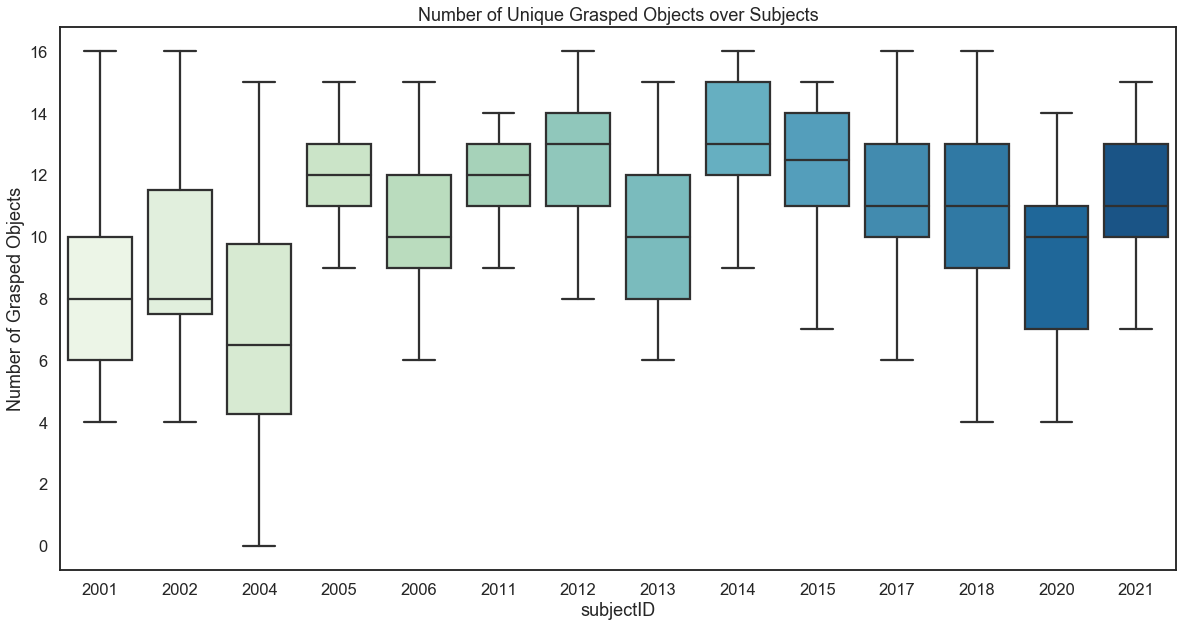

In [10]:
tmpdf = (
    samples_df
    .groupby(['subjectID','trialID','trialNum'])['handData.graspedObject']
    .apply(pd.Series.nunique)
    .rename('Number of Grasped Objects')
    .reset_index()
)
# display(tmpdf)
_, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=tmpdf, x='subjectID', y='Number of Grasped Objects', palette='GnBu')
# sns.boxplot(data=tmpdf, x='trialID', y='Number of Grasped Objects', palette='GnBu')

plt.title('Number of Unique Grasped Objects over Subjects')
plt.savefig(PLOT_DIR+'/graspedObjects_perSubject.png', quality=90)

array([ 0.,  2.,  8., 10.,  1.,  7.,  6.,  9.,  3.,  5.,  4., 11.])

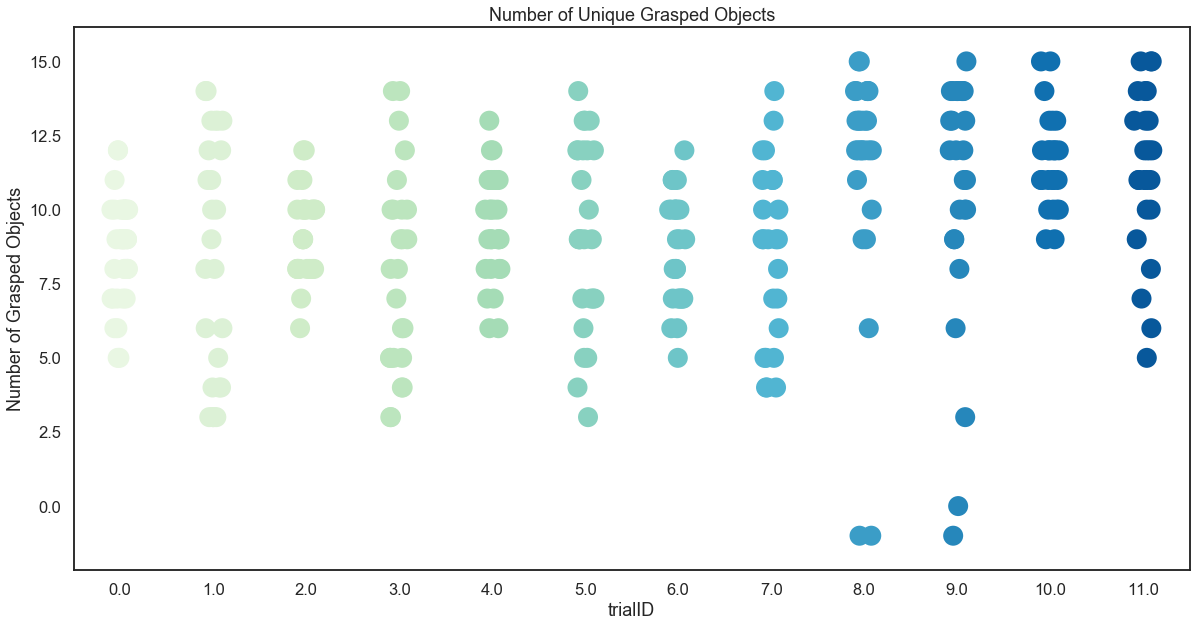

In [27]:
samples_df = samples_df.fillna({'trialID':0})
display(samples_df.trialID.unique())
tmpdf = (
    samples_df
    .groupby(['subjectID','trialID','trialNum'])['handData.graspedObject']
    .apply(lambda x: pd.Series.nunique(x) -1)
    .rename('Number of Grasped Objects')
    .reset_index()
)
# display(tmpdf)
_, ax = plt.subplots(figsize=(20,10))
# sns.pointplot(data=tmpdf, x='trialID', y='Number of Grasped Objects', color='b',
#               errwidth=2, capsize=0, saturation=0.5,ci='sd')
sns.stripplot(data=tmpdf, x='trialID', y='Number of Grasped Objects', palette='GnBu', size=20)
plt.title('Number of Unique Grasped Objects')
plt.savefig(PLOT_DIR+'/graspedObjects_perTrial.png', quality=90)

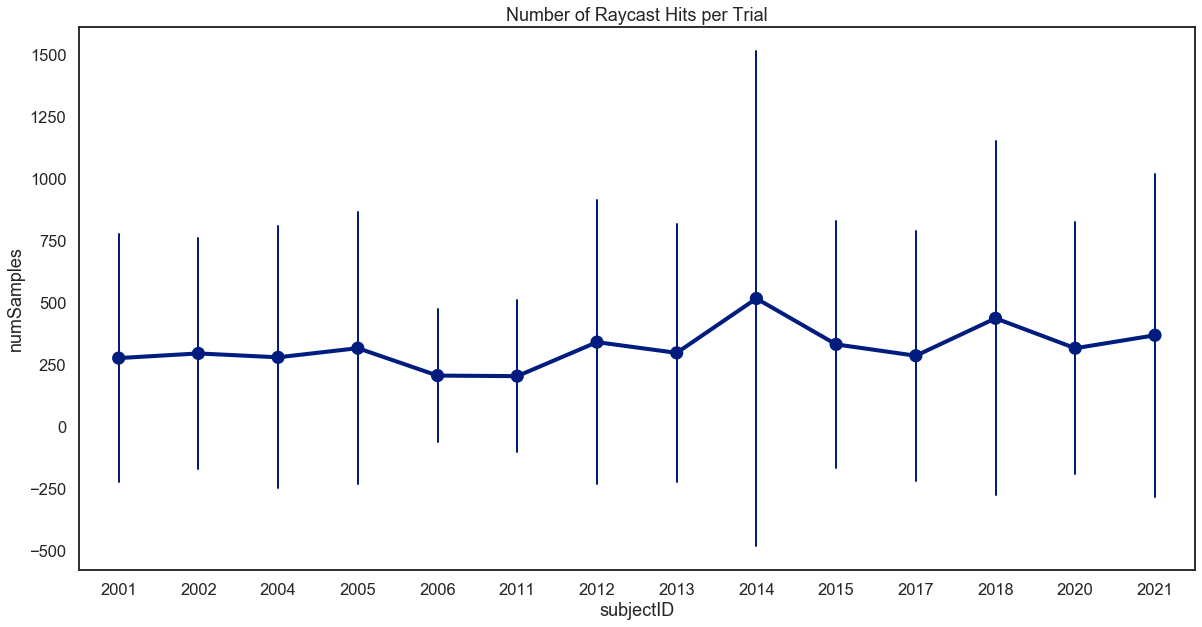

In [12]:
tmpdf = (
    samples_df
    .groupby(['subjectID','trialNum','combinedEye.raycastHitObject'])
    .agg({'trialID':'count'})
    .rename(columns={'trialID':'numSamples'})
    .reset_index()
)
# display(tmpdf)

_, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=tmpdf, x='subjectID', y='numSamples', color='b',
              errwidth=2, capsize=0, saturation=0.5,ci='sd')

plt.title('Number of Raycast Hits per Trial')
plt.savefig(PLOT_DIR+'/SamplesPerObject_subject.png', quality=90)

In [13]:
def replace_objs(s):
    valid_objs = ['Cube_Blue', 'Cube_Green', 'Cube_Red', 'Cube_Yellow', 'Cylinder_Blue', 'Cylinder_Green',
                  'Cylinder_Red','Cylinder_Yellow', 'Sphere_Blue', 'Sphere_Green', 'Sphere_Red',
                  'Sphere_Yellow', 'Tetraeder_Blue', 'Tetraeder_Green', 'Tetraeder_Red', 'Tetraeder_Yellow']
    if s in valid_objs:
        return s
    else:
        return 'Other'



,unixTimestamp,timestamp,combinedEye.raycastHitObject,handData.graspedObject,trialID,subjectID,trialNum
0,NaN,-1.000000,Sphere_Green,NaN,NaN,2001,0
1,NaN,0.333333,Sphere_Green,NaN,NaN,2001,0
2,NaN,0.344821,Sphere_Green,NaN,NaN,2001,0
3,NaN,0.353335,Sphere_Green,NaN,NaN,2001,0
4,NaN,0.363096,Sphere_Green,NaN,NaN,2001,0
...,...,...,...,...,...,...,...
2659657,NaN,49.567665,Other,NaN,2.0,2021,23
2659658,NaN,49.578403,Other,NaN,2.0,2021,23
2659659,NaN,49.589252,Other,NaN,2.0,2021,23
2659660,NaN,49.600506,Other,NaN,2.0,2021,23


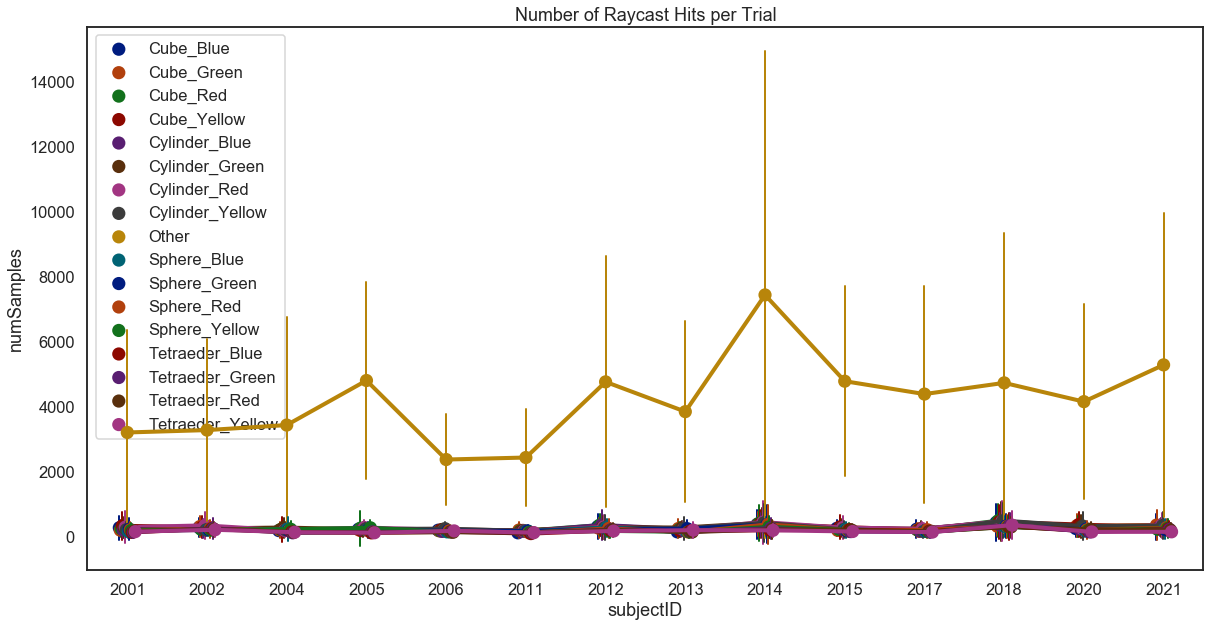

In [14]:
tmpdf = samples_df
tmpdf['combinedEye.raycastHitObject'] = tmpdf['combinedEye.raycastHitObject'].apply(replace_objs)
display(tmpdf)
tmpdf = (
    tmpdf
    .groupby(['subjectID','trialNum','combinedEye.raycastHitObject'])
    .agg({'trialID': 'count'})
    .rename(columns={'trialID': 'numSamples'})
    .reset_index()
)
# display(tmpdf)
_, ax = plt.subplots(1,1,figsize=(20,10))
sns.pointplot(data=tmpdf, x='subjectID', y='numSamples', hue='combinedEye.raycastHitObject',
              errwidth=2, capsize=0, saturation=0.5,ci='sd', palette='dark', dodge=0.2, ax=ax)
plt.legend(loc='upper left')
plt.title('Number of Raycast Hits per Trial')
plt.savefig(PLOT_DIR+'/SamplesPerObject_Shelf.png', quality=90)

,unixTimestamp,timestamp,eyeHit,handData.graspedObject,trialID,subjectID,trialNum
0,NaN,-1.000000,Sphere_Green,NaN,0.0,2001,0
1,NaN,0.333333,Sphere_Green,NaN,0.0,2001,0
2,NaN,0.344821,Sphere_Green,NaN,0.0,2001,0
3,NaN,0.353335,Sphere_Green,NaN,0.0,2001,0
4,NaN,0.363096,Sphere_Green,NaN,0.0,2001,0
...,...,...,...,...,...,...,...
2659657,NaN,49.567665,Other,NaN,2.0,2021,23
2659658,NaN,49.578403,Other,NaN,2.0,2021,23
2659659,NaN,49.589252,Other,NaN,2.0,2021,23
2659660,NaN,49.600506,Other,NaN,2.0,2021,23


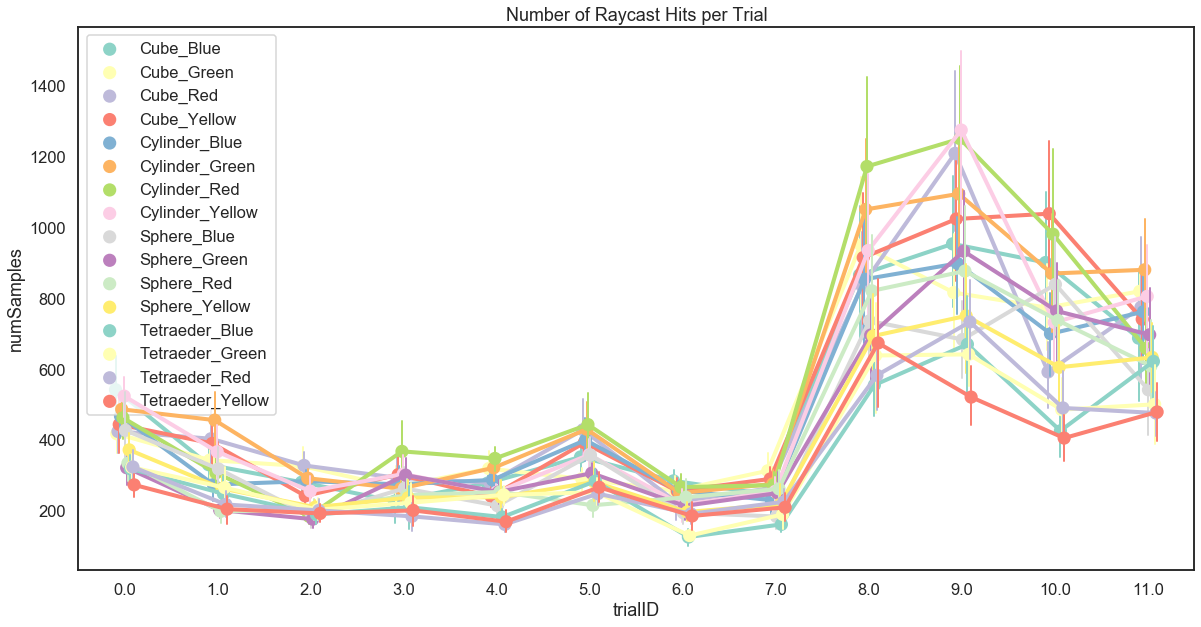

In [31]:
tmpdf = samples_df
# tmpdf['combinedEye.raycastHitObject'] = tmpdf['combinedEye.raycastHitObject'].apply(replace_objs)
tmpdf.rename(columns = {'combinedEye.raycastHitObject':'eyeHit'}, inplace=True)
display(tmpdf)
tmpdf = (
    tmpdf
    .query('eyeHit != "Other"')
    .groupby(['subjectID','trialID','eyeHit'])
    .agg({'trialID': 'count'})
    .rename(columns={'trialID': 'numSamples'})
    .reset_index()
)
# display(tmpdf)
_, ax = plt.subplots(1,1,figsize=(20,10))
sns.pointplot(data=tmpdf, x='trialID', y='numSamples', hue='eyeHit',
              errwidth=2, capsize=0, saturation=0.5,ci=68, palette='Set3', dodge=0.2, ax=ax)
plt.legend(loc='upper left')
plt.title('Number of Raycast Hits per Trial')
plt.savefig(PLOT_DIR+'/SamplesPerObject_Shelf.png', quality=90)

In [ ]:
samples_df['handData.graspedObject'].value_counts()

In [ ]:
samples_df.head()

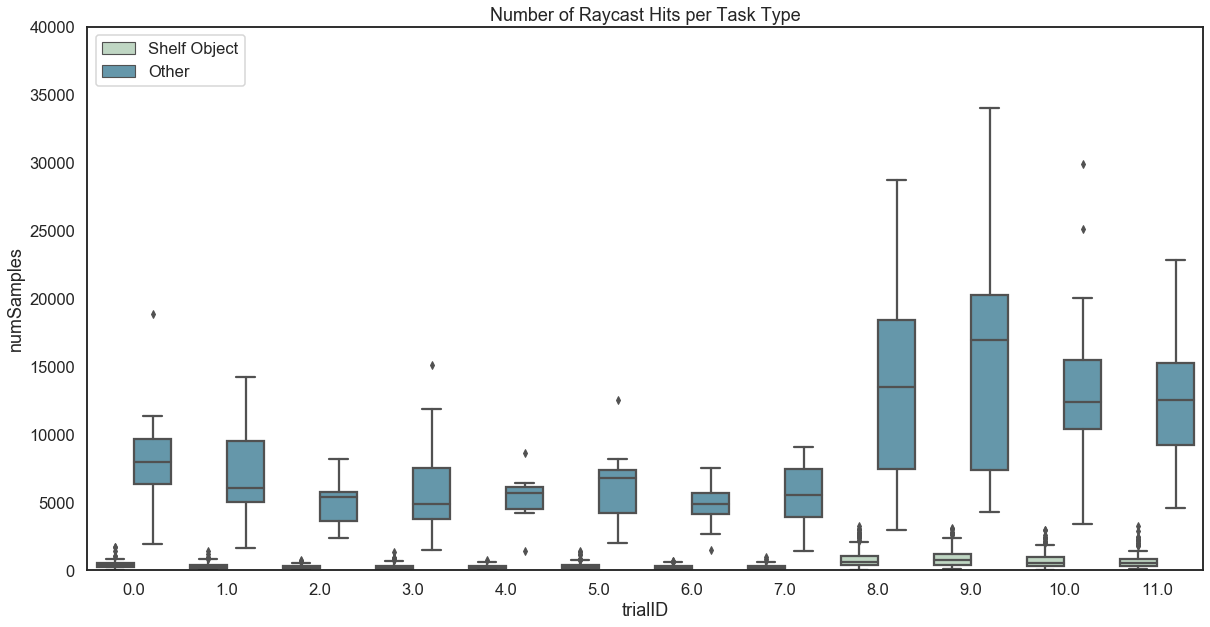

In [37]:
def replace_objs(s):
    valid_objs = ['Cube_Blue', 'Cube_Green', 'Cube_Red', 'Cube_Yellow', 'Cylinder_Blue', 'Cylinder_Green',
                  'Cylinder_Red','Cylinder_Yellow', 'Sphere_Blue', 'Sphere_Green', 'Sphere_Red',
                  'Sphere_Yellow', 'Tetraeder_Blue', 'Tetraeder_Green', 'Tetraeder_Red', 'Tetraeder_Yellow']
    if s in valid_objs:
        return 'Shelf Object'
    else:
        return 'Other'


tmpdf = (
    samples_df
    .groupby(['trialID','subjectID','eyeHit'])
    .agg({'trialID':'count'})
    .rename(columns={'trialID':'numSamples'})
    .reset_index()
)
# display(tmpdf)
tmpdf['eyeHit'] = tmpdf['eyeHit'].apply(replace_objs)
_, ax = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(data=tmpdf, x='trialID', y='numSamples', hue='eyeHit',
              saturation=0.5, palette='GnBu', dodge=0.1, ax=ax)
# sns.pointplot(data=tmpdf, x='trialID', y='numSamples', hue='combinedEye.raycastHitObject',
#               errwidth=2, capsize=0, saturation=0.5,ci='sd', palette='dark', dodge=0.1, ax=ax)
# sns.stripplot(data=tmpdf, x='trialID', y='numSamples', hue='combinedEye.raycastHitObject',
#                palette='dark', jitter=0.1,dodge=0.2, size=10, ax=ax)
plt.ylim(0, 40000)
plt.legend(loc='upper left')
plt.title('Number of Raycast Hits per Task Type')
plt.savefig(PLOT_DIR+'/SamplesPerObject_trials.png', quality=90)

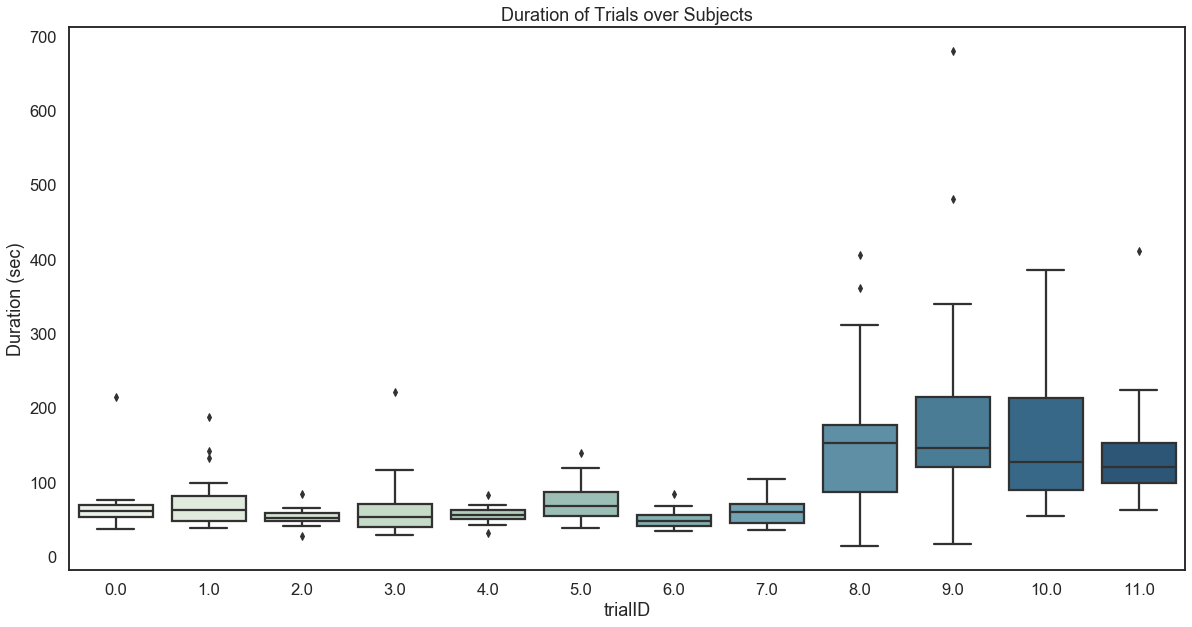

In [34]:
tmpdf = (
    samples_df.groupby(['subjectID','trialID','trialNum'])['timestamp']
    .apply(lambda x: (x.iloc[-1]-x.iloc[0]))
    .reset_index()
)
# display(tmpdf)
# ax = sns.pointplot(data=tmpdf, x='trialID', y='timestamp',
#               errwidth=2, capsize=0, saturation=0.5,ci='sd')
_, ax = plt.subplots(1,1,figsize=(20,10))
ax = sns.boxplot(data=tmpdf, x='trialID', y='timestamp', palette='GnBu',
              saturation=0.5)
ax.set_ylabel('Duration (sec)')
plt.title('Duration of Trials over Subjects')
plt.savefig(PLOT_DIR+'/durationPertrials_taskType.png', quality=90)

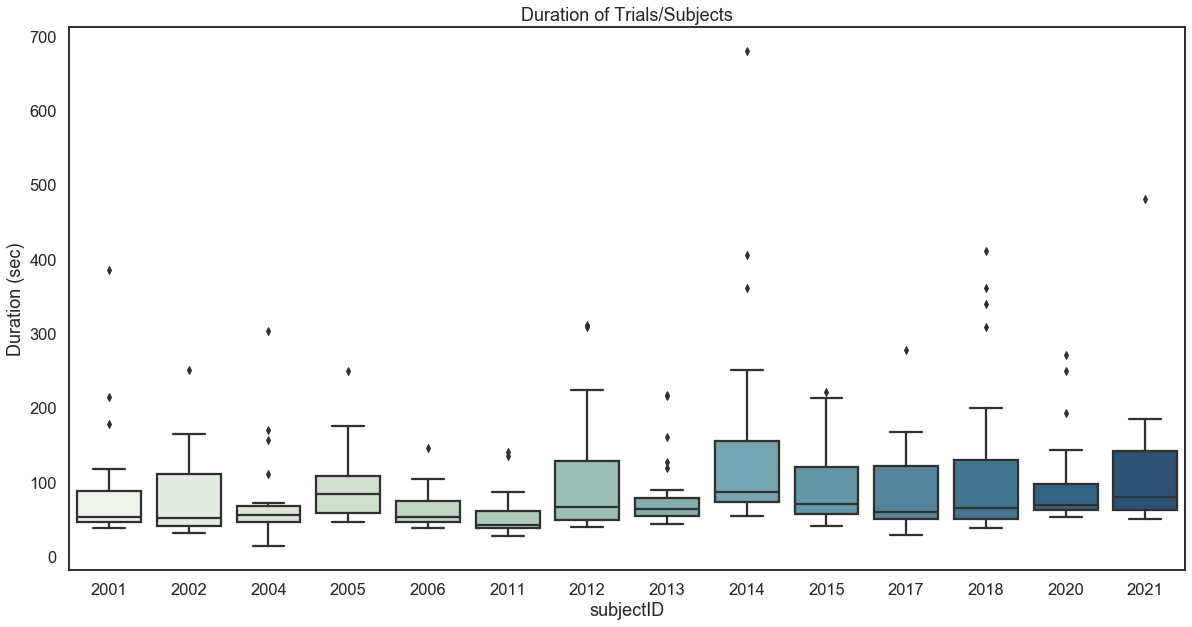

In [35]:
tmpdf = (
    samples_df.groupby(['subjectID', 'trialNum'])['timestamp']
    .apply(lambda x: (x.iloc[-1]-x.iloc[0]))
    .reset_index()
)
# display(tmpdf)
# ax = sns.pointplot(data=tmpdf, x='trialID', y='timestamp',
#               errwidth=2, capsize=0, saturation=0.5,ci='sd')
_, ax = plt.subplots(1,1,figsize=(20,10))
ax = sns.boxplot(data=tmpdf, x='subjectID', y='timestamp', palette='GnBu',
              saturation=0.5)
ax.set_ylabel('Duration (sec)')
plt.title('Duration of Trials/Subjects')
plt.savefig(PLOT_DIR+'/durationPertrials_subject.png', quality=90)

In [ ]:
shelf_df = read_dataFrameFromFile('./Data/allShelfData')
shelf_df.info()
shelf_df.isna().mean()

In [ ]:
%matplotlib inline
%matplotlib inline
tmpdf = (
    shelf_df
    .groupby('subjectID')
    .apply(lambda x: x.isna().mean())
    .drop(columns=['subjectID','trialID'])
    .reset_index()
    .set_index('subjectID')
)
_, _ = plt.subplots(1,1,figsize=(12,12))
ax = sns.heatmap(tmpdf, vmin=0, vmax=0.25, annot=True, linewidths=.5, cmap='viridis_r', annot_kws={"size": 25})
ax.set_ylim(len(tmpdf)-0.1, -0.5)
plt.yticks(rotation=0, fontsize=25) 
plt.xticks(rotation=45, fontsize=25)
plt.xlabel(fontsize=20)
plt.title('Proportion of Missing Vlues of Shelf Configuration', fontsize=30)
plt.savefig(PLOT_DIR+'/shelf_missingVals.png', quality=90, transparent=True)

In [ ]:
samples_df.head()
    

In [ ]:
samples_df['handData.graspedObject'].fillna(0, inplace=True)
samples_df['numHits'] = (
        samples_df['combinedEye.raycastHitObject']
        .groupby((samples_df['combinedEye.raycastHitObject']!=samples_df['combinedEye.raycastHitObject'].shift())
        .cumsum())
        .transform('size')
)
samples_df['eyeChange'] = (
                samples_df['combinedEye.raycastHitObject']!=samples_df['combinedEye.raycastHitObject'].shift()
)
samples_df['handChange'] = (
                samples_df['handData.graspedObject']!=samples_df['handData.graspedObject'].shift()
)

# samples_df['dwellTime'] = (
#                 samples_df['combinedEye.raycastHitObject']!=samples_df['combinedEye.raycastHitObject'].shift()
# )

tmpdf = samples_df
tmpdf.loc[(~tmpdf['handChange']),'handData.graspedObject' ] = 0

grasp = np.where(tmpdf.handChange)[0]
next_grasp = np.where(tmpdf.handChange.shift())[0]
display(tmpdf.loc[next_grasp])

In [ ]:
filtered_df.head()

In [ ]:
filtered_df['combinedEye.raycastHitObject'] = filtered_df['combinedEye.raycastHitObject'].apply(replace_objs)
display(filtered_df.tail())

In [ ]:
# %matplotlib notebook
tmpdf = (
    filtered_df
    .rename(columns={'combinedEye.raycastHitObject':'eyeHit', 'handData:graspedObject':'grasp'})
    .query('subjectID == 1006 & trialNum == 6')
    .query('eyeHit != "Other"')
    .sort_values('timestamp')
    [['timestamp', 'eyeHit']]
    .set_index('timestamp')
)
sns.set(context = "talk", style="whitegrid", palette="dark", font_scale=1, rc={'figure.figsize':(11.7,8.27)})
_, ax = plt.subplots(figsize=(20,10))
tmpdf = pd.get_dummies(tmpdf, prefix='')
tmpdf = tmpdf.mul(np.arange(1,17))
tmpdf.plot(ax=ax)


In [ ]:
raise

# Scratch

In [ ]:
np.arange(1,17)